In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [4]:
# Будем использовать только обучающую выборку
data = pd.read_csv('../../ML_datasets/TA_restaurants_curated.csv')
data.head()

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


In [5]:
# названия и типы колонок
data.dtypes

Unnamed: 0             int64
Name                  object
City                  object
Cuisine Style         object
Ranking              float64
Rating               float64
Price Range           object
Number of Reviews    float64
Reviews               object
URL_TA                object
ID_TA                 object
dtype: object

In [6]:
#проверка наличия пропущенных значений
data.isnull().sum()

Unnamed: 0               0
Name                     0
City                     0
Cuisine Style        31351
Ranking               9651
Rating                9630
Price Range          47855
Number of Reviews    17344
Reviews               9616
URL_TA                   0
ID_TA                    0
dtype: int64

In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 125527


In [8]:
# Обработка пропусков

# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))


Колонка Ranking. Тип данных float64. Количество пустых значений 9651, 7.69%.
Колонка Rating. Тип данных float64. Количество пустых значений 9630, 7.67%.
Колонка Number of Reviews. Тип данных float64. Количество пустых значений 17344, 13.82%.


In [14]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Ranking,Rating,Number of Reviews
0,1.0,5.0,136.0
1,2.0,4.5,812.0
2,3.0,4.5,567.0
3,4.0,5.0,564.0
4,5.0,4.5,316.0
5,6.0,4.5,745.0
6,7.0,4.5,1455.0
7,8.0,4.5,675.0
8,9.0,4.5,923.0
9,10.0,4.5,450.0


In [9]:
# Фильтр по пустым значениям поля Ranking 
data[data['Ranking'].isnull()]

,Unnamed: 0,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
3239,3239,Reggae Rita's,Amsterdam,"['Caribbean', 'Jamaican']",NaN,-1.0,$$ - $$$,NaN,"[['A TRUE BLESSING FOR YOUR STOMACH'], ['01/10...",/Restaurant_Review-g188590-d12291891-Reviews-R...,d12291891
3240,3240,Lokaal Spaanders,Amsterdam,"['French', 'European', 'Fusion', 'Street Food'...",NaN,-1.0,$$ - $$$,NaN,"[[], []]",/Restaurant_Review-g188590-d12333583-Reviews-L...,d12333583
3241,3241,Bistro Berlage,Amsterdam,"['Dutch', 'European']",NaN,-1.0,$$ - $$$,NaN,"[['Bistro is changing!'], ['01/09/2018']]",/Restaurant_Review-g188590-d13276050-Reviews-B...,d13276050
3242,3242,Fondue oost,Amsterdam,"['French', 'German', 'Belgian', 'Dutch', 'Euro...",NaN,-1.0,NaN,NaN,"[['Might look good on socialMedia, sucks in r....",/Restaurant_Review-g188590-d13331300-Reviews-F...,d13331300
3243,3243,De Soepbar,Amsterdam,NaN,NaN,4.0,NaN,NaN,"[['good soups!!!'], ['12/31/2017']]",/Restaurant_Review-g188590-d13333424-Reviews-D...,d13333424
3244,3244,Pancake King,Amsterdam,"['Pizza', 'Fast Food']",NaN,2.0,NaN,NaN,"[[], []]",/Restaurant_Review-g188590-d13340867-Reviews-P...,d13340867
3245,3245,Vlaardingse Haringhandel,Amsterdam,"['Dutch', 'European']",NaN,5.0,NaN,NaN,"[[], []]",/Restaurant_Review-g188590-d13349987-Reviews-V...,d13349987
3246,3246,Flora,Amsterdam,NaN,NaN,5.0,NaN,NaN,"[['Authentic American Mexican in Amsterdam'], ...",/Restaurant_Review-g188590-d13354042-Reviews-F...,d13354042
3247,3247,Pigs&Punch,Amsterdam,"['Bar', 'Barbecue', 'Grill', 'Pub']",NaN,-1.0,NaN,NaN,"[[], []]",/Restaurant_Review-g188590-d13356735-Reviews-P...,d13356735
3253,3253,Belhuis de Gans,Amsterdam,NaN,NaN,NaN,NaN,NaN,NaN,/Restaurant_Review-g188590-d746761-Reviews-Bel...,d746761


In [10]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['Ranking'].isnull()].index
flt_index

Int64Index([  3239,   3240,   3241,   3242,   3243,   3244,   3245,   3246,
              3247,   3253,
            ...
            125517, 125518, 125519, 125520, 125521, 125522, 125523, 125524,
            125525, 125526],
           dtype='int64', length=9651)

In [15]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['Ranking']

3239     NaN
3240     NaN
3241     NaN
3242     NaN
3243     NaN
3244     NaN
3245     NaN
3246     NaN
3247     NaN
3253     NaN
3254     NaN
3255     NaN
3256     NaN
3257     NaN
3258     NaN
3259     NaN
3260     NaN
3261     NaN
3262     NaN
3263     NaN
3264     NaN
3265     NaN
3266     NaN
3267     NaN
3268     NaN
3269     NaN
3270     NaN
3271     NaN
3272     NaN
3273     NaN
          ..
125497   NaN
125498   NaN
125499   NaN
125500   NaN
125501   NaN
125502   NaN
125503   NaN
125504   NaN
125505   NaN
125506   NaN
125507   NaN
125508   NaN
125509   NaN
125510   NaN
125511   NaN
125512   NaN
125513   NaN
125514   NaN
125515   NaN
125516   NaN
125517   NaN
125518   NaN
125519   NaN
125520   NaN
125521   NaN
125522   NaN
125523   NaN
125524   NaN
125525   NaN
125526   NaN
Name: Ranking, Length: 9651, dtype: float64

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [16]:
data_num_Ranking = data_num[['Ranking']]
data_num_Ranking.head()

,Ranking
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [18]:
# Импьютация средними значениями
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
data_num_imp = imp_num.fit_transform(data_num_Ranking)
data_num_imp

array([[1.00000000e+00],
       [2.00000000e+00],
       [3.00000000e+00],
       ...,
       [3.65746398e+03],
       [3.65746398e+03],
       [3.65746398e+03]])

In [29]:
#Нет пустых значений
np.unique(data_num_imp)

array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 1.6442e+04, 1.6443e+04,
       1.6444e+04])

In [22]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))


Колонка Cuisine Style. Тип данных object. Количество пустых значений 31351, 24.98%.
Колонка Price Range. Тип данных object. Количество пустых значений 47855, 38.12%.
Колонка Reviews. Тип данных object. Количество пустых значений 9616, 7.66%.


In [24]:
cat_temp_data = data[['Price Range']]
cat_temp_data.head()
cat_temp_data['Price Range'].unique()

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

In [25]:
cat_temp_data[cat_temp_data['Price Range'].isnull()].shape

(47855, 1)

In [26]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['$$ - $$$'],
       ['$$$$'],
       ['$$$$'],
       ...,
       ['$$ - $$$'],
       ['$$ - $$$'],
       ['$$ - $$$']], dtype=object)

In [27]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['$', '$$ - $$$', '$$$$'], dtype=object)

In [28]:
cat_temp_data['Price Range'].unique()

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

In [30]:
#Кодирование категориальных признаков целочисленными значениями (label encoding)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [32]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [33]:
cat_enc['c1'].unique()

array(['$$ - $$$', '$$$$', '$'], dtype=object)

In [34]:
np.unique(cat_enc_le)

array([0, 1, 2])

In [35]:
le.inverse_transform([0, 1, 2])

array(['$', '$$ - $$$', '$$$$'], dtype=object)

In [45]:
#Кодирование категориальных признаков наборами бинарных значений (one-hot encoding)
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [46]:
cat_enc.shape

(125527, 1)

In [47]:
cat_enc_ohe.shape

(125527, 3)

In [48]:
cat_enc_ohe

<125527x3 sparse matrix of type '<class 'numpy.float64'>'
	with 125527 stored elements in Compressed Sparse Row format>

In [49]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]])

In [51]:
cat_enc.head(10)

,c1
0,$$ - $$$
1,$$$$
2,$$$$
3,$$$$
4,$$$$
5,$$$$
6,$$ - $$$
7,$$$$
8,$$$$
9,$


In [52]:
#масштабирование данных
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [79]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Number of Reviews']].dropna())

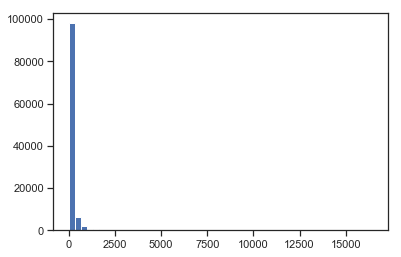

In [80]:
plt.hist(data['Number of Reviews'].dropna(), 50)
plt.show()

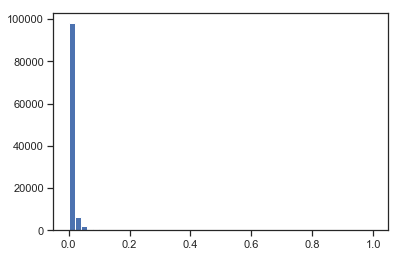

In [81]:
plt.hist(sc1_data, 50)
plt.show()

In [83]:
#нормализация
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['Number of Reviews']].dropna())

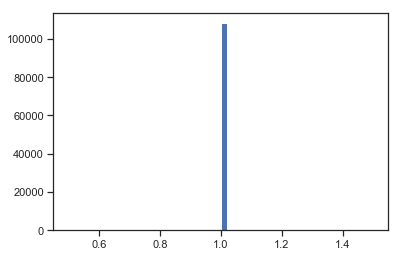

In [84]:
plt.hist(sc3_data, 50)
plt.show()